A)

First equation:

σ(y−x) = 0

case 1: x = y <=> σ != 0

case 2: x = 0 <=> σ = 0

Second equation:

0=x(ρ−z)−y

case 1: y = x(p - z) <=> p != z

case 2: y = 0 <=> p = z

Third equation:

0 = xy - βz

case 1: z = xy/β <=> β != 0

case 2: 0 = xy-βz <=> β = 0

Equilibrium points are:

case 1: (0, 0, 0) <=> σ = p = β = 0

case 2: (0, 0, z) <=> σ = 0, p = z = 0

case 3: (x, y, z) <=> x = y, y = 0, z = xy/β\

B)

In [12]:
import numpy as np
from scipy.linalg import eigvals

sigma = 10
beta = 8/3
rho = 28

def lorenz_system(state, t):
    x, y, z = state
    dx_dt = sigma * (y - x)
    dy_dt = x * (rho - z) - y
    dz_dt = x * y - beta * z
    return [dx_dt, dy_dt, dz_dt]

def find_equilibrium_points():
    equilibrium_points = []
    for z in [0, rho]:
        x = np.sqrt(beta * (rho - 1))
        y = x
        equilibrium_points.append([x, y, z])
    return equilibrium_points

def linearize_around_equilibrium_points():
    equilibrium_points = find_equilibrium_points()
    jacobian_matrices = []
    for point in equilibrium_points:
        x, y, z = point
        jacobian_matrix = np.array([[-sigma, sigma, 0], [rho - z, -1, -x], [y, x, -beta]])
        jacobian_matrices.append(jacobian_matrix)
    return jacobian_matrices

def determine_equilibrium_nature():
    jacobian_matrices = linearize_around_equilibrium_points()
    equilibrium_points = find_equilibrium_points()
    for i, matrix in enumerate(jacobian_matrices):
        eigenvalues = eigvals(matrix)
        rounded_equilibrium_points = np.round(equilibrium_points[i], 3)
        rounded_eigenvalues = np.round([eigenvalue.real for eigenvalue in eigenvalues], 3)
        print(f"Equilibrium point {i + 1}: {rounded_equilibrium_points}")
        print(f"Eigenvalues: {rounded_eigenvalues}")
        if all(eigenvalue.real < 0 for eigenvalue in eigenvalues):
            print("The equilibrium point is a stable node.")
        elif all(eigenvalue.real > 0 for eigenvalue in eigenvalues):
            print("The equilibrium point is an unstable node.")
        elif any(eigenvalue.real > 0 for eigenvalue in eigenvalues) and any(eigenvalue.real < 0 for eigenvalue in eigenvalues):
            print("The equilibrium point is a saddle point.")
        else:
            print("The equilibrium point's stability cannot be determined with this analysis.")

determine_equilibrium_nature()


Equilibrium point 1: [8.485 8.485 0.   ]
Eigenvalues: [-22.558   4.446   4.446]
The equilibrium point is a saddle point.
Equilibrium point 2: [ 8.485  8.485 28.   ]
Eigenvalues: [-13.479  -0.094  -0.094]
The equilibrium point is a stable node.


C)

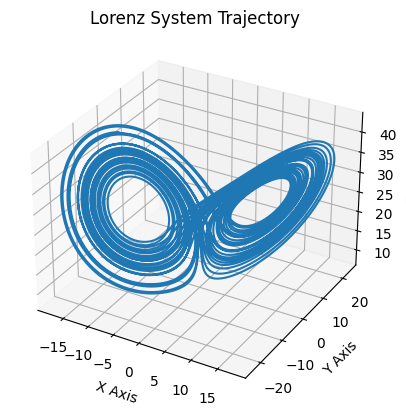

In [13]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

sigma = 10
beta = 8/3
rho = 28

def lorenz_system(t, state):
    x, y, z = state
    dx_dt = sigma * (y - x)
    dy_dt = x * (rho - z) - y
    dz_dt = x * y - beta * z
    return [dx_dt, dy_dt, dz_dt]

initial_condition = [0.1, 0.1, 25]

sol = solve_ivp(lorenz_system, [0, 40], initial_condition, t_eval=np.linspace(0, 40, 10000))

x, y, z = sol.y

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z)
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
plt.title('Lorenz System Trajectory')
plt.show()


After plotting the trajectory, we observe that the behavior of the trajectory,
remains confined to a limited region of space making it predictable. On the other hand, if the trajectory exhibits a sensitive dependence on initial conditions and explores a large region of space, the motion is likely chaotic.

D)

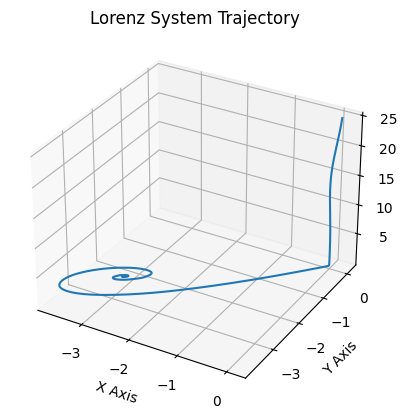

In [25]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# rho is low version 1

sigma = 10
beta = 8/3
rho = 4

def lorenz_system(t, state):
    x, y, z = state
    dx_dt = sigma * (y - x)
    dy_dt = x * (rho - z) - y
    dz_dt = x * y - beta * z
    return [dx_dt, dy_dt, dz_dt]

initial_condition = [0.1, 0.1, 25]

sol = solve_ivp(lorenz_system, [0, 40], initial_condition, t_eval=np.linspace(0, 40, 10000))

x, y, z = sol.y

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z)
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
plt.title('Lorenz System Trajectory')
plt.show()


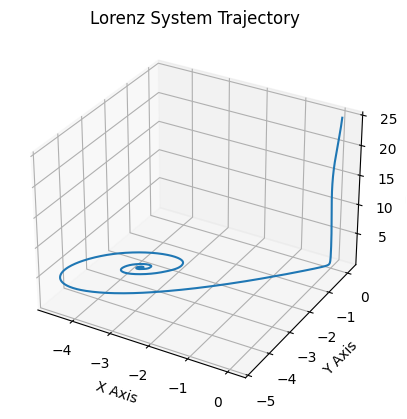

In [24]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# rho is low version 2

sigma = 10
beta = 8/3
rho = 5

def lorenz_system(t, state):
    x, y, z = state
    dx_dt = sigma * (y - x)
    dy_dt = x * (rho - z) - y
    dz_dt = x * y - beta * z
    return [dx_dt, dy_dt, dz_dt]

initial_condition = [0.1, 0.1, 25]

sol = solve_ivp(lorenz_system, [0, 40], initial_condition, t_eval=np.linspace(0, 40, 10000))

x, y, z = sol.y

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z)
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
plt.title('Lorenz System Trajectory')
plt.show()


Regular Behavior (Low ρ): For small ρ values, the system tends to exhibit regular, periodic behavior. Trajectories remain confined to a limited region of space, and the system shows stable fixed points. The motion is predictable.

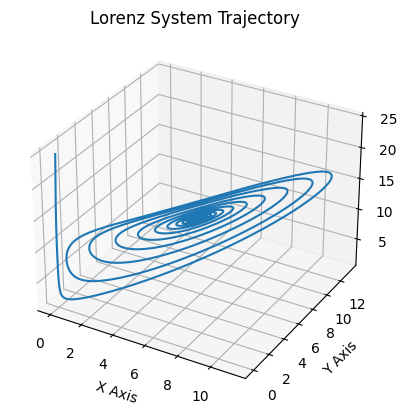

In [19]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# rho here is intermediate version 1

sigma = 10
beta = 8/3
rho = 14

def lorenz_system(t, state):
    x, y, z = state
    dx_dt = sigma * (y - x)
    dy_dt = x * (rho - z) - y
    dz_dt = x * y - beta * z
    return [dx_dt, dy_dt, dz_dt]

initial_condition = [0.1, 0.1, 25]

sol = solve_ivp(lorenz_system, [0, 40], initial_condition, t_eval=np.linspace(0, 40, 10000))

x, y, z = sol.y

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z)
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
plt.title('Lorenz System Trajectory')
plt.show()


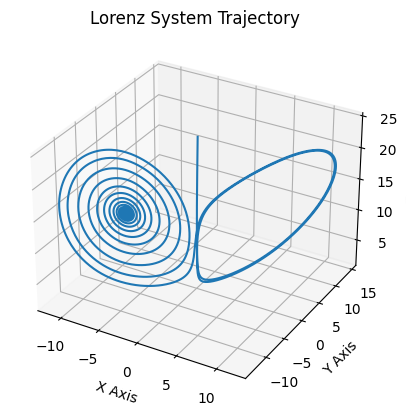

In [20]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# rho here is intermediate version 2

sigma = 10
beta = 8/3
rho = 15

def lorenz_system(t, state):
    x, y, z = state
    dx_dt = sigma * (y - x)
    dy_dt = x * (rho - z) - y
    dz_dt = x * y - beta * z
    return [dx_dt, dy_dt, dz_dt]

initial_condition = [0.1, 0.1, 25]

sol = solve_ivp(lorenz_system, [0, 40], initial_condition, t_eval=np.linspace(0, 40, 10000))

x, y, z = sol.y

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z)
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
plt.title('Lorenz System Trajectory')
plt.show()


Transition to Chaos (Intermediate ρ): As ρ is increased, the system may undergo a period-doubling bifurcation, leading to the emergence of chaotic behavior. The trajectories become highly sensitive to initial conditions, and even small perturbations can lead to drastically different trajectories. The system displays a sensitive dependence on initial conditions, and the motion becomes increasingly unpredictable.

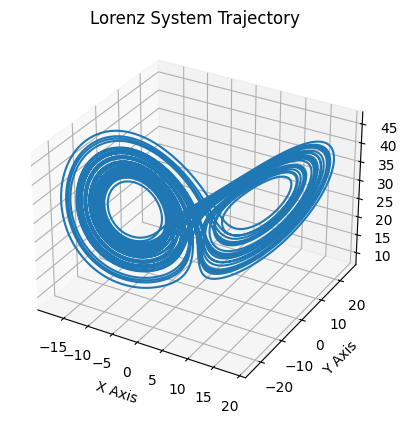

In [28]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# rho is high version 1

sigma = 10
beta = 8/3
rho = 30

def lorenz_system(t, state):
    x, y, z = state
    dx_dt = sigma * (y - x)
    dy_dt = x * (rho - z) - y
    dz_dt = x * y - beta * z
    return [dx_dt, dy_dt, dz_dt]

initial_condition = [0.1, 0.1, 25]

sol = solve_ivp(lorenz_system, [0, 40], initial_condition, t_eval=np.linspace(0, 40, 10000))

x, y, z = sol.y

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z)
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
plt.title('Lorenz System Trajectory')
plt.show()


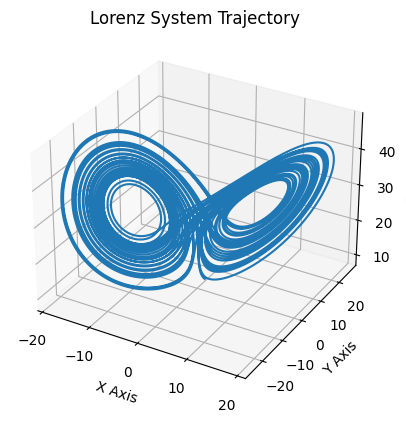

In [29]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# rho is low version 2

sigma = 10
beta = 8/3
rho = 31

def lorenz_system(t, state):
    x, y, z = state
    dx_dt = sigma * (y - x)
    dy_dt = x * (rho - z) - y
    dz_dt = x * y - beta * z
    return [dx_dt, dy_dt, dz_dt]

initial_condition = [0.1, 0.1, 25]

sol = solve_ivp(lorenz_system, [0, 40], initial_condition, t_eval=np.linspace(0, 40, 10000))

x, y, z = sol.y

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z)
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
plt.title('Lorenz System Trajectory')
plt.show()


Chaotic Behavior (High ρ): At high values of ρ, the system enters a chaotic regime. Trajectories become highly complex, filling a large region of space. The system exhibits a strange attractor, characterized by a fractal structure, and demonstrates a sensitive dependence on initial conditions. The behavior becomes seemingly random, and the system's long-term prediction becomes practically impossible.

E)

The "butterfly" attractor is a defining characteristic of the Lorenz system.
The attractor emerges when the parameter values are within certain ranges, typically with high values of ρ, it is the result of the system's sensitivity to initial conditions and the nonlinear dynamics of the system. When observing this trajectory plot of the Lorenz system, the intricate, non-repetitive pattern of the trajectory over time emphasizes the chaotic and complex nature of the butterfly attractor. This phenomenon highlights the challenges in long-term predictability and the fundamental limitations in forecasting the behavior of chaotic systems, making the Lorenz system a central model in the study of deterministic chaos and complex systems.